#Solution 1

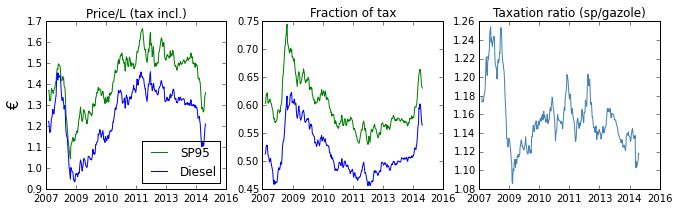

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt  #Loading only the library we'll need. 
import numpy as np
import matplotlib.dates as mdates

# to load a file with a date column
date, gazht, spht, gaz, sp = np.loadtxt('files/essence.txt', delimiter=' ', 
                                        usecols=(0,1,2,5,6), unpack=True, 
                                        converters={0: mdates.strpdate2num('%d/%m/%Y')})


import pandas as pd
#pd.set_option('display.mpl_style', 'default')

fig, ax = plt.subplots(1, 3, figsize=(11,3))

ax[0].plot(date,sp,label='SP95' , color='green'  )
ax[0].plot(date,gaz,label='Diesel', color='blue'  )
ax[0].set_title('Price/L (tax incl.)')
ax[0].legend(loc='lower right')
ax[0].set_ylabel(u'\u20AC',fontsize=15) # unicode for euro symbol

sptax=(sp-spht)/sp
gaztax=(gaz-gazht)/gaz
ax[1].plot(date,sptax, color='green' ) 
ax[1].plot(date,gaztax, color='blue' )
ax[1].set_title('Fraction of tax')

ax[2].plot(date,sptax/gaztax, color='steelblue')
ax[2].set_title('Taxation ratio (sp/gazole) ')



for ax_i in ax:
    ax_i.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

#plt.savefig('files/Exercise-1-gaz-price.png')    
plt.show()



##Solution 2

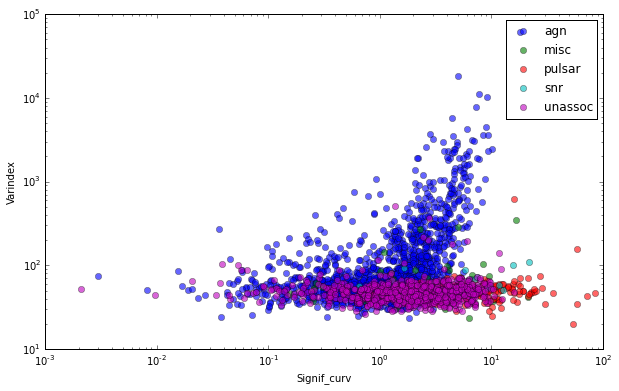

In [4]:
%matplotlib inline
from IPython.html.widgets import interact, fixed
import numpy as np
import matplotlib.pyplot as plt


name, srctype     =    np.loadtxt('files/3FGL-type-GLON-GLAT.txt', unpack=True,
                               usecols=[0,1], dtype='string')
GLON, GLAT, Signif_avg, Varindex, Signif_curv, Eflux = np.loadtxt('files/3FGL-type-GLON-GLAT.txt',
                                                                  unpack=True, usecols=[2,3,4,5,6,7])

data_dict ={'name':name, 'srctype':srctype, 'GLON':GLON, 'GLAT':GLAT, 
       'Sigma':Signif_avg, 'Varindex':Varindex, 'Signif_curv':Signif_curv, 'Eflux':Eflux  }


def myplot( xkey='Varindex', ykey='Signif_curv', sigma=5,xlog=True, ylog=True):

    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    x=data_dict[xkey]                         # Get the array from the dictionay
    y=data_dict[ykey]
    index=np.where( Signif_avg > sigma ) # selecting only sources above a certain signif value
    x=x[index]
    y=y[index]
    z=srctype[index] # Need to do the same for the source type array
    
    srctype_list=np.unique(srctype)  # get a list of unique lable names
    for src in srctype_list:         # looping on source type 
        index=np.where(z == src)
        plt.plot(x[index],y[index],'o', alpha=0.6,label=src) # plot the sources category by category
        
    if xlog: ax.set_xscale('log') # if xlog is True then setting log scale
    if ylog: ax.set_yscale('log')
    ax.set_xlabel(xkey)
    ax.set_ylabel(ykey)    
    plt.legend(numpoints=1)    
    plt.show()    
    

interact( myplot, sigma=(5,100),xkey=('GLON', 'GLAT','Varindex', 'Signif_curv', 'Eflux'),
         ykey=('GLON', 'GLAT','Varindex', 'Signif_curv', 'Eflux') )

